In [5]:
%run DMD_functions.ipynb

In [6]:
mat = scipy.io.loadmat('CYLINDER_ALL.mat')
print(mat.keys())
u=mat['UALL']
v=mat['VALL']
vort=mat['VORTALL']

del mat

nx=199; ny=449

dict_keys(['__header__', '__version__', '__globals__', 'UALL', 'UEXTRA', 'VALL', 'VEXTRA', 'VORTALL', 'VORTEXTRA', 'm', 'n', 'nx', 'ny'])


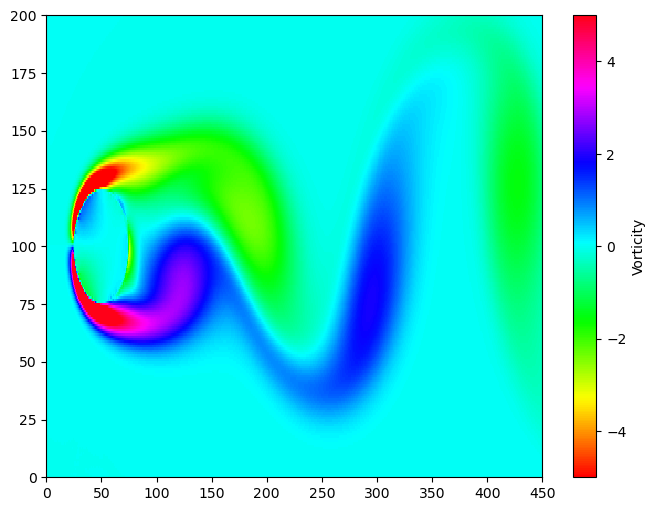

In [7]:
koji=19

vort1=vort[:,koji]

vort1 = np.clip(vort1, -5,5)

fig, ax = plt.subplots(figsize=(8, 6))
y_os = np.linspace(0,200,200)
x_os = np.linspace(0,450,450)

c = ax.pcolormesh(x_os, y_os, vort1.reshape((-1,199)).T, cmap='hsv')
fig.colorbar(c, ax=ax, label='Vorticity')



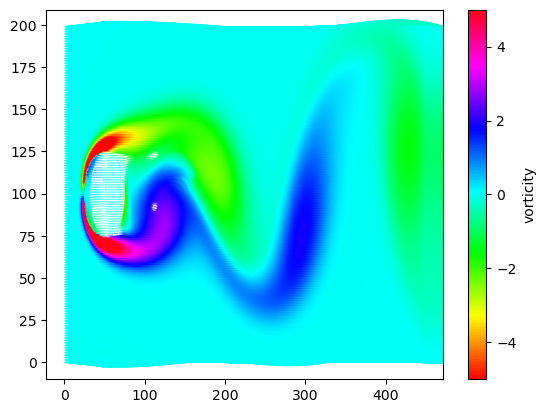

In [8]:
#quiver plot sa brzinama...

plt.figure()
x_os_2=np.repeat(x_os[:-1], 199); y_os_2=np.tile(y_os[:-1], 449)
q = plt.quiver(x_os_2, y_os_2, u[:,koji], v[:,koji], vort1, cmap='hsv', scale=10)
q.set_clim(-5, 5)
cb = plt.colorbar(q)
cb.set_label('vorticity')
plt.show()

In [9]:
N=vort.shape[1]-1
Z_v, L_v = DMD(vort[:,:N], vort[:,1:N+1], k=44)
print(L_v)

[ 1.     +0.j       0.97848+0.20635j  0.97848-0.20635j  0.91484+0.40382j
  0.91484-0.40382j  0.81182+0.5839j   0.81182-0.5839j   0.67386+0.73886j
  0.67386-0.73886j  0.5069 +0.86201j  0.5069 -0.86201j  0.31811+0.94805j
  0.31811-0.94805j  0.11564+0.99329j  0.11564-0.99329j -0.09182+0.99578j
 -0.09182-0.99578j -0.29532+0.9554j  -0.29532-0.9554j  -0.07062+0.j
 -0.33248+0.9301j  -0.33248-0.9301j  -0.48611+0.8739j  -0.48611-0.8739j
 -0.52275+0.84985j -0.52275-0.84985j -0.65598+0.75478j -0.65598-0.75478j
 -0.69125+0.72246j -0.69125-0.72246j -0.79761+0.60317j -0.79761-0.60317j
 -0.99971+0.02394j -0.99971-0.02394j -0.97326+0.22972j -0.97326-0.22972j
 -0.98314+0.18286j -0.98314-0.18286j -0.90491+0.42561j -0.90491-0.42561j
 -0.92423+0.38179j -0.92423-0.38179j -0.82552+0.56431j -0.82552-0.56431j]


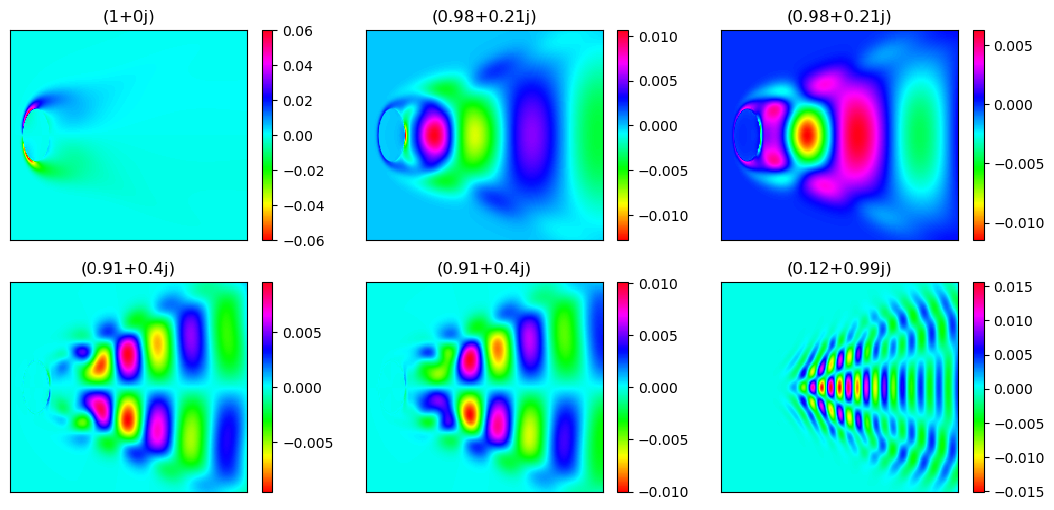

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(13, 6))
koji_z=[0, 1, 1, 3, 3, 13]
for i in range(6):
    if(i not in [2,4]):
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.real(Z_v[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv')
    else:
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.imag(Z_v[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv')
    plt.colorbar(c, ax=axs[i//3, i%3], orientation='vertical')
    axs[i//3,i%3].set_xticks([])
    axs[i//3,i%3].set_yticks([])
    axs[i//3, i%3].set_title(np.around(L_v[koji_z[i]],2))
plt.show()

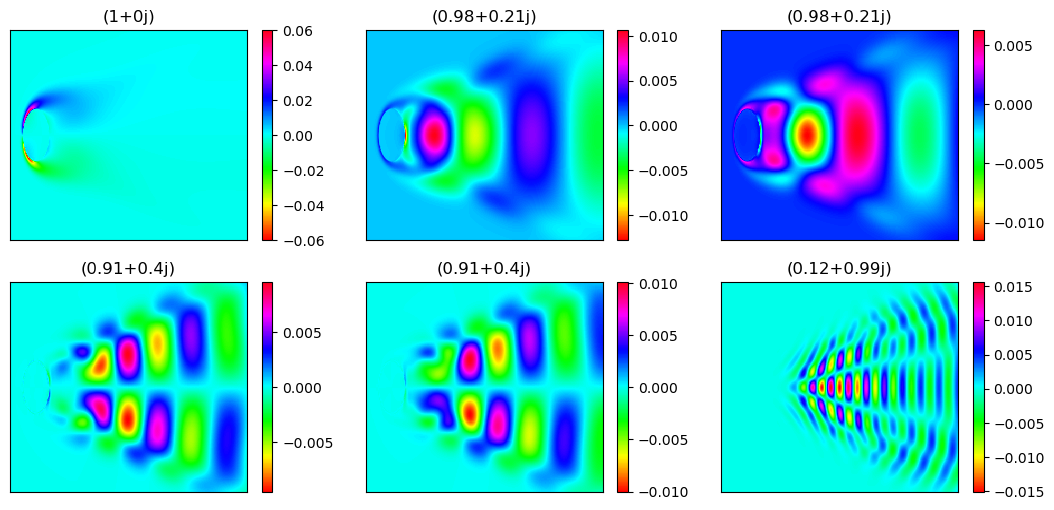

In [11]:
Z_v_ex, L_v_ex= DMD_exact(vort[:,:N], vort[:,1:N+1], k=44)
#print(L_v)
fig, axs = plt.subplots(2, 3, figsize=(13, 6))
koji_z=[0, 1, 1, 3, 3, 13]
for i in range(6):
    if(i not in [2,4]):
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.real(Z_v_ex[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv')
    else:
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.imag(Z_v_ex[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv')
    plt.colorbar(c, ax=axs[i//3, i%3], orientation='vertical')
    axs[i//3,i%3].set_xticks([])
    axs[i//3,i%3].set_yticks([])
    axs[i//3, i%3].set_title(np.around(L_v_ex[koji_z[i]],2))
plt.show()

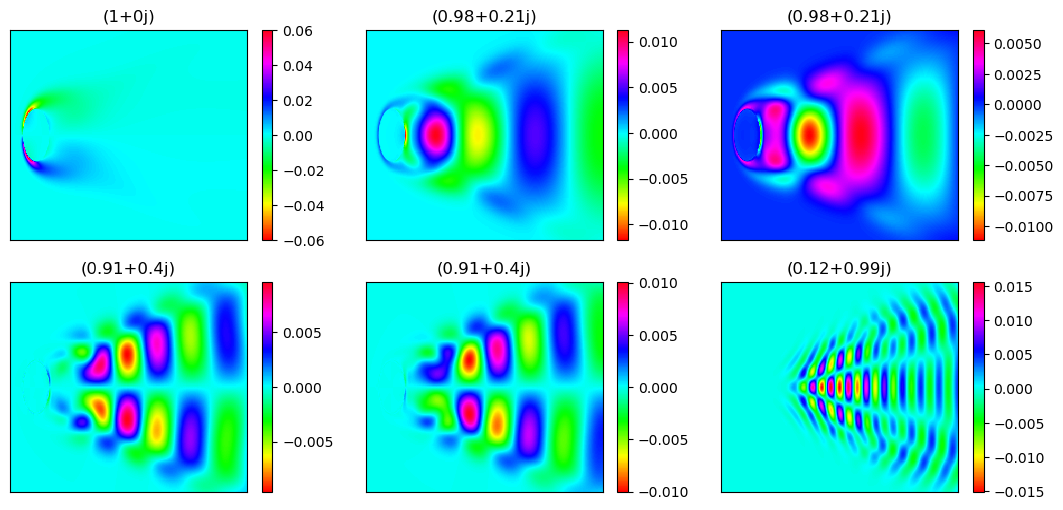

In [12]:
Z_v_ge, L_v_ge, _= GEDMD(vort[:,:N], vort[:,1:N+1], k=44)
#print(L_v)
fig, axs = plt.subplots(2, 3, figsize=(13, 6))
koji_z=[0, 1, 1, 3, 3, 13]
for i in range(6):
    if(i not in [2,4]):
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.real(Z_v_ge[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv')
    else:
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.imag(Z_v_ge[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv')
    plt.colorbar(c, ax=axs[i//3, i%3], orientation='vertical')
    axs[i//3,i%3].set_xticks([])
    axs[i//3,i%3].set_yticks([])
    axs[i//3, i%3].set_title(np.around(L_v_ge[koji_z[i]],2))
plt.show()

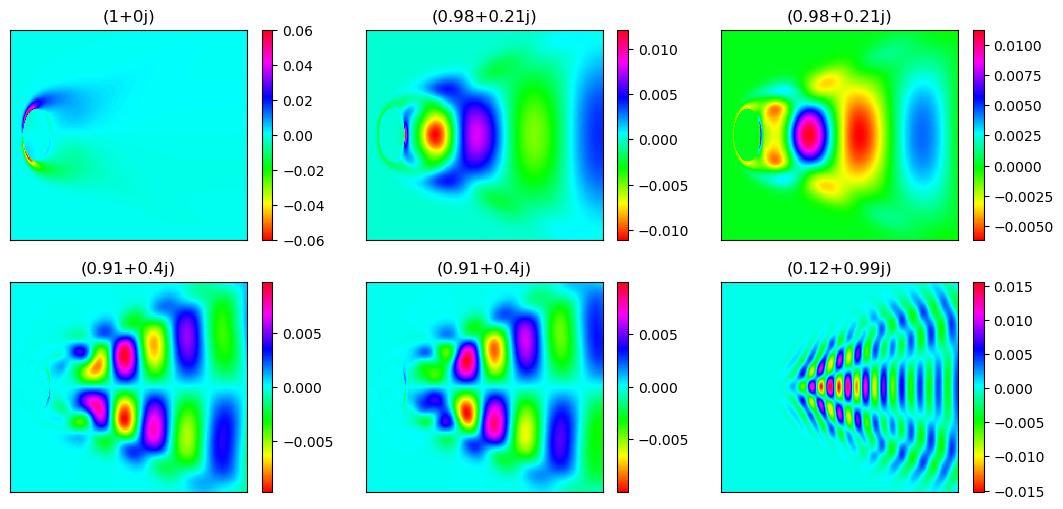

In [13]:
Z_v_qr, L_v_qr, _, _, _= GEDMDQ(vort[:,:N], vort[:,1:N+1], k=44)
#print(L_v)
fig, axs = plt.subplots(2, 3, figsize=(13, 6))
koji_z=[0, 1, 1, 3, 3, 13]
for i in range(6):
    if(i not in [2,4]):
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.real(Z_v_qr[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv')
    else:
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.imag(Z_v_qr[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv')
    plt.colorbar(c, ax=axs[i//3, i%3], orientation='vertical')
    axs[i//3,i%3].set_xticks([])
    axs[i//3,i%3].set_yticks([])
    axs[i//3, i%3].set_title(np.around(L_v_qr[koji_z[i]],2))
plt.show()

In [14]:
"""#sa obje brzine i vorticity
S = np.concatenate((u, v, vort), axis=0)
N=S.shape[1]
Z, L= DMD(S[:,:N-1], S[:,1:N], k=44)
Z.shape
L

plt.figure()
koji_z=0
q = plt.quiver(x_os_2, y_os_2, Z[:nx*ny,koji_z], Z[nx*ny:nx*ny*2,koji_z], np.real(Z[nx*ny*2:,koji_z]), cmap='hsv', scale=5)
q.set_clim(-0.02, 0.02)
cb = plt.colorbar(q)
cb.set_label('vorticity')
plt.show()

plt.figure()
q = plt.quiver(x_os_2, y_os_2, Z[:nx*ny,koji_z], Z[nx*ny:nx*ny*2,koji_z], np.imag(Z[nx*ny*2:,koji_z]), cmap='hsv', scale=1)
q.set_clim(-0.005, 0.005)
cb = plt.colorbar(q)
cb.set_label('vorticity')
plt.show()"""

"#sa obje brzine i vorticity\nS = np.concatenate((u, v, vort), axis=0)\nN=S.shape[1]\nZ, L= DMD(S[:,:N-1], S[:,1:N], k=44)\nZ.shape\nL\n\nplt.figure()\nkoji_z=0\nq = plt.quiver(x_os_2, y_os_2, Z[:nx*ny,koji_z], Z[nx*ny:nx*ny*2,koji_z], np.real(Z[nx*ny*2:,koji_z]), cmap='hsv', scale=5)\nq.set_clim(-0.02, 0.02)\ncb = plt.colorbar(q)\ncb.set_label('vorticity')\nplt.show()\n\nplt.figure()\nq = plt.quiver(x_os_2, y_os_2, Z[:nx*ny,koji_z], Z[nx*ny:nx*ny*2,koji_z], np.imag(Z[nx*ny*2:,koji_z]), cmap='hsv', scale=1)\nq.set_clim(-0.005, 0.005)\ncb = plt.colorbar(q)\ncb.set_label('vorticity')\nplt.show()"